# Сборный проект № 1

## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных
- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы долларов)
- *EU_sales* — продажи в Европе (миллионы долларов)
- *JP_sales* — продажи в Японии (миллионы долларов)
- *Other_sales* — продажи в других странах (миллионы долларов)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Данные за 2016 год могут быть неполными.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
# Импорт нужных библиотек и классов
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
games_df = pd.read_csv('games.csv')

In [3]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


По первому шагу видим, что есть данные по продажам игр на различных платформах за разные годы. Очень много пропусков в данных, но данные по продажам и название платформы заполнены у всех.

## Шаг 2. Подготовьте данные

- **Замените названия столбцов (приведите к нижнему регистру):**

In [5]:
games_df.columns = map(str.lower, games_df.columns)
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- **Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему:**

In [6]:
#games_df['year_of_release'] = games_df['year_of_release'].fillna(0)
#games_df['year_of_release'] = games_df['year_of_release'].astype(int)

In [7]:
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')

In [8]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Поменял тип в столбце user_score. Для него просто привёл значения к типу float64.

- **Обработайте пропуски при необходимости:**

Причины отсутствия данных вижу в том, что скорее всего они собирались из различных источников и в каких-то источниках не было полного набора.  

В столбце user_score были значения 'tbd', но при смене типа на float64 они были заменены на NaN, что считаю правильным, т.к. никакой смысловой нагрузки значение 'tbd' не несёт.

- **Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец:**

In [9]:
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']

## Шаг 3. Проведите исследовательский анализ данных

- **Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

In [10]:
games_df['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

Видим, что с каждым годом количество игр растёт. Данные за все периоды наверное неважны, если мы хотим планировать продажи на следующий год, то скорее всего нужна "недавняя" статистика.

- **Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [11]:
# Рейтинг платформ по суммарным продажам
platforms_by_sales = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
platforms_by_sales

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [12]:
# Найдем игры, выпущенные на платформах с суммарной выручкой более 500 млн. долл.
games_on_top_platforms = games_df[games_df['platform'].isin(platforms_by_sales[platforms_by_sales['total_sales'] > 500]['platform']) ]
games_on_top_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [13]:
def create_hist(df_global, column_name, platform_g):
    df = df_global.query('platform == @platfrom_g')
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    plt.figure(figsize=(9,5))
    sns.distplot(df[column_name], kde=False, bins=15, hist_kws={"range":(Q1-3*IQR, Q3+3*IQR)}).set_title(platform_g)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


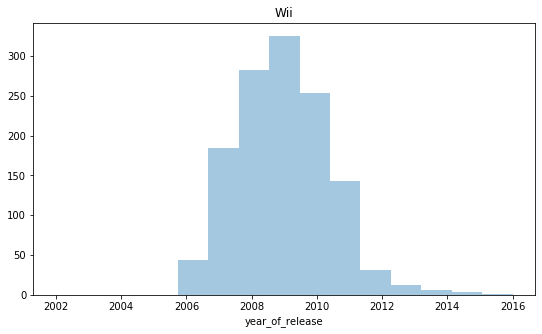

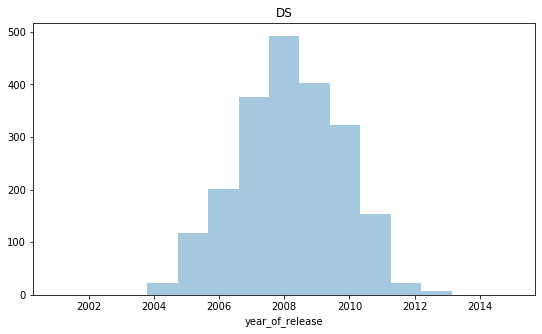

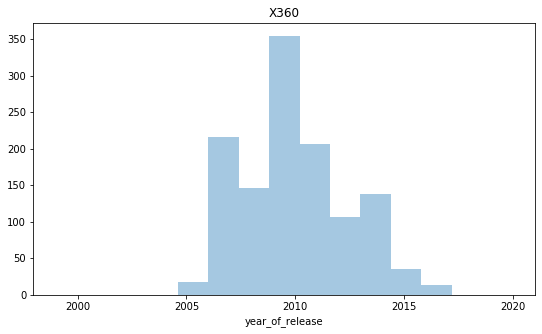

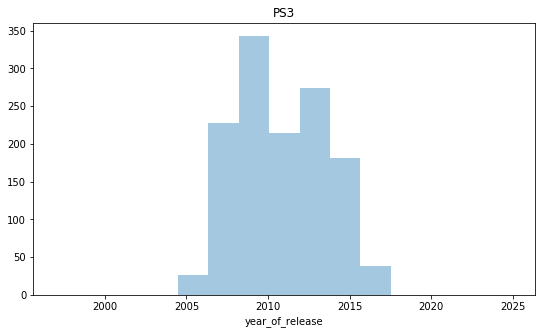

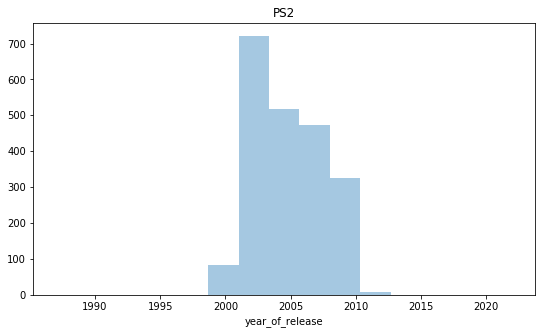

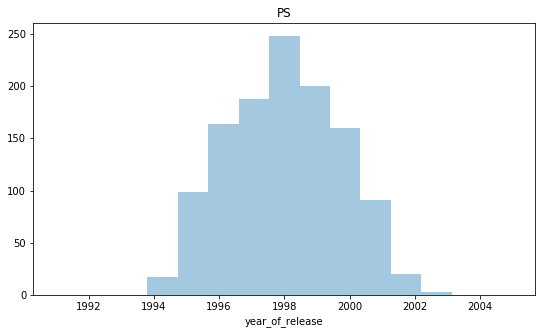

In [14]:
for platfrom_g in games_on_top_platforms['platform'].unique():
    create_hist(games_on_top_platforms, 'year_of_release', platfrom_g)
plt.show()

Как видно по распределениям в среднем популярная платформа "живет" 10 лет.

- **Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

Будем считать актуальным периодом годы с 2007 по 2016, т.к. в предудыщем пункте выяснили что в среднем платформа остается популярной 10 лет, таким образом мы отсечём данные по точно ненужным в 2017 году платформам.

In [15]:
games_df['year_of_release'] = games_df['year_of_release'].fillna(0)
games_df['year_of_release'] = games_df['year_of_release'].astype('int')
games_df = games_df.query('year_of_release >= 2007')

In [16]:
pivot_games = pd.pivot_table(games_df, values='total_sales', index=['platform'], columns=['year_of_release'], aggfunc=np.sum)

In [17]:
pivot_games['decade_sales'] = 0
for year in range(2007, 2017):
    pivot_games['decade_sales'] += pivot_games[year].fillna(0)
pivot_games.sort_values(by='decade_sales', ascending=False)

year_of_release,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,decade_sales
platform,,,,,,,,,,,
PS3,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60,910.38
X360,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,901.37
Wii,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,754.03
DS,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN,535.54
PS4,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25,314.14
3DS,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14,257.81
PSP,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN,183.31
PS2,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN,162.38
PC,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25,160.57


По сводной таблице видим, что по продажам за десятилетие лидируют платформы PS3, X360, Wii, DS. Но по годовым продажам видно, что время этих приставок уже прошло и будущее за платформами PS4, 3DS, XOne, WiiU.

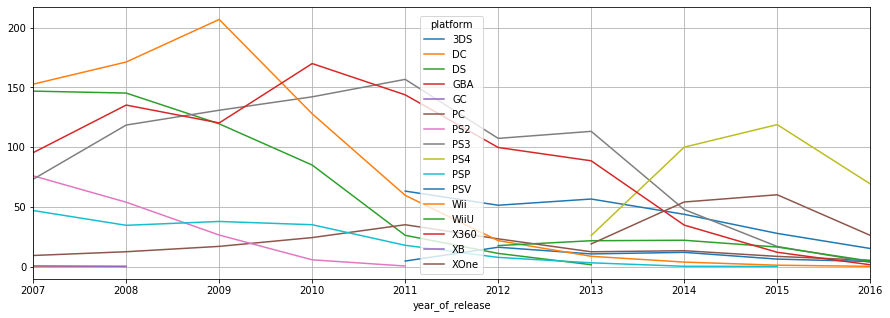

In [18]:
pivot_games.drop(columns=['decade_sales']).T.plot(figsize=(15,5), grid=True)
plt.show()

По графику видно, что в 2016 году продажи у всех идут на спад, но это видимо из-за того, что данные за 2016 год неполные.

- **Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.**

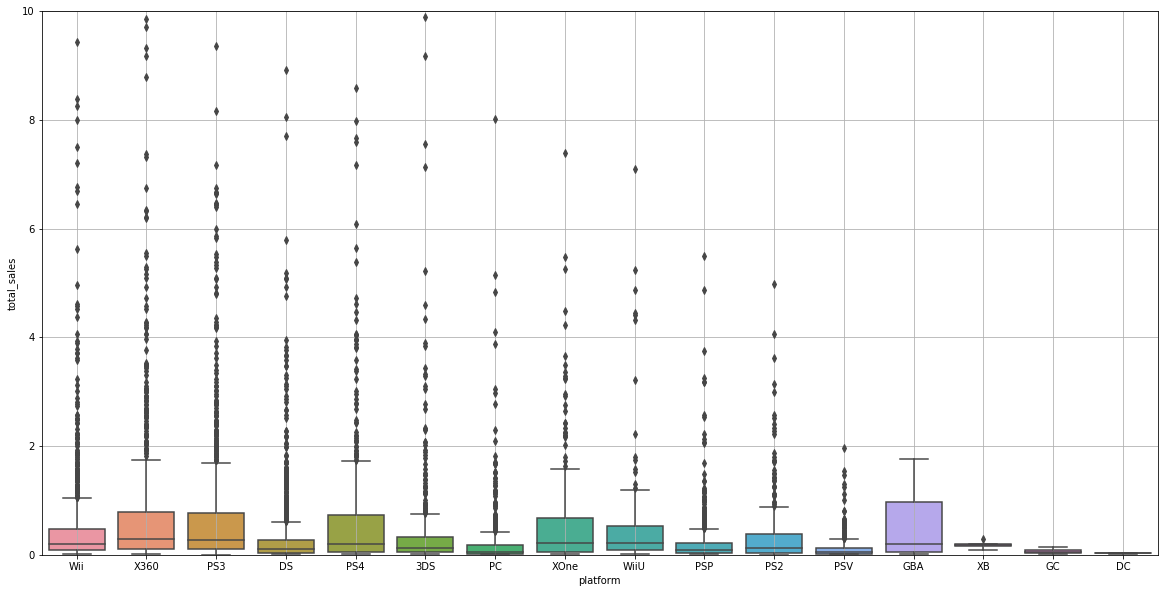

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(x='platform', y='total_sales', data = games_df)
plt.ylim(0, 10)
plt.grid()
plt.show()

По графику видим, что самые прибыльные игры на платформах X360, PS3, PS4 и XOne.
Если оценивать средние продажи, то разница невелика. В аутсайдерах: PC,PSV, DC, GC. В лидерах: X360, PS3, PS4, XOne, WiiU.

- **Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

In [20]:
def make_correlation_plot_and_matrix(df, xcolumn, ycolumn, title):
    plt.scatter(df[xcolumn], df[ycolumn], alpha=0.3)
    plt.xlabel(xcolumn)
    plt.ylabel(ycolumn)
    plt.title(title)
    plt.show()
    corr_matrix = df[[xcolumn, ycolumn]].corr()
    print(corr_matrix)

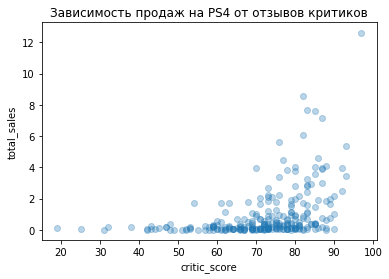

              critic_score  total_sales
critic_score      1.000000     0.406568
total_sales       0.406568     1.000000


In [21]:
games_ps4_df = games_df.query('platform == "PS4"')
make_correlation_plot_and_matrix(games_ps4_df, 'critic_score', 'total_sales', 'Зависимость продаж на PS4 от отзывов критиков')

Вывод: на примере платформы PS4 видим, что зависимость продаж от отзывов критиков маленькая.

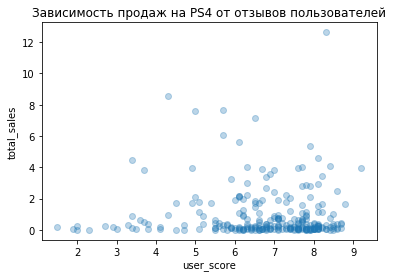

             user_score  total_sales
user_score     1.000000    -0.031957
total_sales   -0.031957     1.000000


In [22]:
make_correlation_plot_and_matrix(games_ps4_df, 'user_score', 'total_sales', 'Зависимость продаж на PS4 от отзывов пользователей')

Вывод: продажи игр на PS4 совсем не зависят от отзывов пользователей

- **Соотнесите выводы с продажами игр на других платформах.**

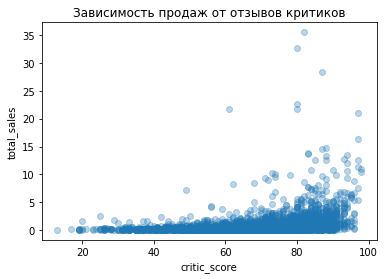

              critic_score  total_sales
critic_score      1.000000     0.292553
total_sales       0.292553     1.000000


In [23]:
make_correlation_plot_and_matrix(games_df, 'critic_score', 'total_sales', 'Зависимость продаж от отзывов критиков')

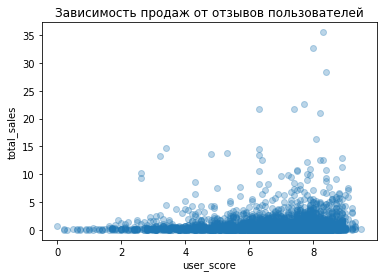

             user_score  total_sales
user_score     1.000000     0.094214
total_sales    0.094214     1.000000


In [24]:
make_correlation_plot_and_matrix(games_df, 'user_score', 'total_sales', 'Зависимость продаж от отзывов пользователей')

Вывод: зависимость продаж от отзывов у платформы PS4 и остальных платформ идентичная, т.е. её нет в обоих случаях.

- **Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [25]:
# Средние значения продаж игр по жанрам
games_df.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

genre
Shooter         1.016168
Platform        0.805769
Sports          0.585472
Racing          0.544538
Role-Playing    0.524865
Action          0.477975
Fighting        0.463687
Misc            0.426105
Simulation      0.362714
Puzzle          0.245139
Strategy        0.196553
Adventure       0.136544
Name: total_sales, dtype: float64

In [26]:
games_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
Action          1050.59
Shooter          678.80
Sports           658.07
Misc             487.89
Role-Playing     465.03
Racing           265.19
Platform         230.45
Simulation       199.13
Fighting         166.00
Adventure        129.99
Puzzle            79.18
Strategy          68.99
Name: total_sales, dtype: float64

Вывод: Если смотреть среднюю прибыльность игр по жанрам, то самыми прибыльными будут: Shooter, Platform, Soprts, Racing. Наоборот неприбыльными будут: Strategy и Adventure.

Если же оценивать по суммарным продажам внутри жанров, то в лидерах Action, Shooter, Sports. В аутсайдерах Puzzle и Strategy.

## Шаг 4. Составьте портрет пользователя каждого региона
**Определите для пользователя каждого региона (NA, EU, JP):**

- **Самые популярные платформы (топ-5). Опишите различия в долях продаж.**

In [27]:
def calc_popular_groups(df, groupby_column, value_column):
    print((df.groupby(groupby_column)[value_column].sum() / df.groupby(groupby_column)[value_column].sum().sum()).sort_values(ascending=False).head())

In [28]:
calc_popular_groups(games_df, 'platform', 'na_sales')

platform
X360    0.260612
Wii     0.195812
PS3     0.179469
DS      0.128960
PS4     0.051183
Name: na_sales, dtype: float64


In [29]:
calc_popular_groups(games_df, 'platform', 'eu_sales')

platform
PS3     0.233775
X360    0.187887
Wii     0.156932
PS4     0.103128
DS      0.087654
Name: eu_sales, dtype: float64


In [30]:
calc_popular_groups(games_df, 'platform', 'jp_sales')

platform
DS     0.211108
3DS    0.206370
PS3    0.160654
PSP    0.135857
Wii    0.121275
Name: jp_sales, dtype: float64


Вывод: в регионах NA и EU популярны одни и те же платформы, но с разной долей продаж. В JP же в лидерах присутствуют 3DS и PSP, которых нет в лидерах NA и EU.

- **Самые популярные жанры (топ-5). Поясните разницу.**

In [31]:
calc_popular_groups(games_df, 'genre', 'na_sales')

genre
Action          0.231660
Shooter         0.164793
Sports          0.152438
Misc            0.121984
Role-Playing    0.082564
Name: na_sales, dtype: float64


In [32]:
calc_popular_groups(games_df, 'genre', 'eu_sales')

genre
Action     0.245353
Shooter    0.168232
Sports     0.154586
Misc       0.093282
Racing     0.076478
Name: eu_sales, dtype: float64


In [33]:
calc_popular_groups(games_df, 'genre', 'jp_sales')

genre
Role-Playing    0.308776
Action          0.197490
Misc            0.100068
Sports          0.082614
Adventure       0.055192
Name: jp_sales, dtype: float64


Вывод: по NA и EU популярные жанры практически идентичны (за исключением последнего жанра), в JP на первом месте стоит жанр Role-Playing, которого нет в топ-5 в EU, а в NA он на 5-ом месте по популярности.

- **Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [34]:
# Для начала добавим числовой столбец, который будет отвечать за рейтинг

games_df['rating'] = games_df['rating'].fillna('')

# Рейтинг переводим в число: варианты — EC, E, E10+, T, M, RP, пусто
def rating_num_foo(row):
    if row['rating'] == 'EC':
        return 1
    elif row['rating'] == 'E':
        return 2
    elif row['rating'] == 'E10+':
        return 3
    elif row['rating'] == 'T':
        return 4
    elif row['rating'] == 'M':
        return 5
    elif row['rating'] == 'RP':
        return 6
    else:
        return 0 # пусто

games_df['rating_num'] = games_df.apply(rating_num_foo, axis=1)

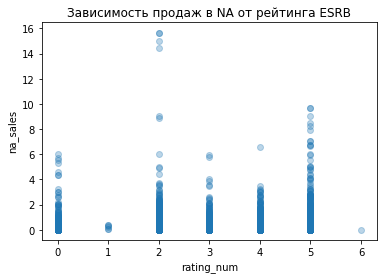

            rating_num  na_sales
rating_num    1.000000  0.189261
na_sales      0.189261  1.000000


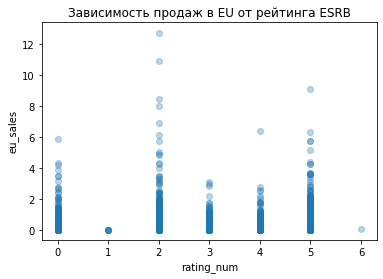

            rating_num  eu_sales
rating_num    1.000000  0.161376
eu_sales      0.161376  1.000000


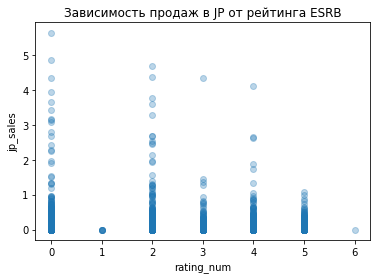

            rating_num  jp_sales
rating_num    1.000000 -0.056339
jp_sales     -0.056339  1.000000


In [35]:
make_correlation_plot_and_matrix(games_df, 'rating_num', 'na_sales', 'Зависимость продаж в NA от рейтинга ESRB')
make_correlation_plot_and_matrix(games_df, 'rating_num', 'eu_sales', 'Зависимость продаж в EU от рейтинга ESRB')
make_correlation_plot_and_matrix(games_df, 'rating_num', 'jp_sales', 'Зависимость продаж в JP от рейтинга ESRB')

Вывод: продажи не зависят от рейтинга ESRB

## Шаг 5. Проверьте гипотезы

- **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Воспользуемся гипотезой о равенстве средних двух генеральных совокупностей.

In [36]:
games_xone_df = games_df[(games_df['platform'] == "XOne") & (~games_df['user_score'].isnull())]
games_pc_df = games_df[(games_df['platform'] == "PC") & (~games_df['user_score'].isnull())]

In [37]:
# Найдем средний пользовательский рейтинг для двух платформ
print('Средний польз. рейтинг Xbox One:', (games_xone_df['user_score'].mean()))
print('Средний польз. рейтинг PC:', (games_pc_df['user_score'].mean()))

Средний польз. рейтинг Xbox One: 6.52142857142857
Средний польз. рейтинг PC: 6.765499124343266


Видим что средние значения почти одинаковые. Но для проверки гипотезы надо провести статистический тест.
Для его выполнения надо узнать отличаются ли дисперсии выборок.

In [38]:
# Найдем дисперсию пользовательского рейтинга по двум тарифам
print('Дисперсия польз. рейтинга Xbox One:', (games_xone_df['user_score'].var()))
print('Дисперсия польз. рейтинга PC:', (games_pc_df['user_score'].var()))

Дисперсия польз. рейтинга Xbox One: 1.9069968429360702
Дисперсия польз. рейтинга PC: 2.3403339171044952


Можно сказать что дисперсия равна - значит параметр equal_var в метод ttest_ind надо будет передавать со значением True.  
Нулевой гипотезой в нашем случае будет равенство средних пользов. рейтингов по 2 платформам.

In [39]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    games_xone_df['user_score'], 
    games_pc_df['user_score'], equal_var=True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.05554752084307562
Не получилось отвергнуть нулевую гипотезу


Вывод: средние значения пользовательского рейтинга по платформам Xbox One и PC одинаковые.

- **Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные**

Также воспользуемся гипотезой о равенстве средних двух генеральных совокупностей.

In [40]:
games_action_df = games_df[(games_df['genre'] == "Action") & (~games_df['user_score'].isnull())]
games_sports_df = games_df[(games_df['genre'] == "Sports") & (~games_df['user_score'].isnull())]

In [41]:
# Найдем средний пользовательский рейтинг для двух жанров
print('Средний польз. рейтинг Action:', (games_action_df['user_score'].mean()))
print('Средний польз. рейтинг Sports:', (games_sports_df['user_score'].mean()))

Средний польз. рейтинг Action: 6.836079077429997
Средний польз. рейтинг Sports: 6.307979626485568


In [42]:
# Найдем дисперсию пользовательского рейтинга по двум жанрам
print('Дисперсия польз. рейтинга Xbox One:', (games_action_df['user_score'].var()))
print('Дисперсия польз. рейтинга PC:', (games_sports_df['user_score'].var()))

Дисперсия польз. рейтинга Xbox One: 1.8301893952255222
Дисперсия польз. рейтинга PC: 2.814034856727075


Дисперсия различается - значит параметр equal_var в метод ttest_ind надо будет передавать со значением False.
Нулевой гипотезой в нашем случае будет равенство средних пользов. рейтингов по 2 жанрам.

In [43]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    games_action_df['user_score'], 
    games_sports_df['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.540665510055229e-11
Отвергаем нулевую гипотезу


Вывод: средние пользовательские рейтинги для жанров Action и Sports различаются.

## Шаг 6. Напишите общий вывод

В ходе работы над проектом было установлено следующее:  

1) Cредняя продожительность актуальности игровой платформы составляет 10 лет. В связи с этим для прогноза прибыльности видеоигр по датасету были выбраны платформы PS4, 3DS, XOne, WiiU. Скорее всего они будут лидерами как минимум в 2017 году.

2) Не нужно ориентироваться на отзывы критиков и пользователей при оценки успешности игр. 

3) Продажи по платформам в EU и NA примерно совпадают, в отличие от JP -- там свои успешные платформы.

4) Похожая ситуация обстоит с жанрами игр -- в EU и NA одни жанры в топе, в JP другие.

5) От рейтинга ESRB продажи также не зависят.

6) Были проверены 2 гипотезы про пользовательский рейтинг (для 2 платформ и 2 жанров).